In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
df = pd.read_csv("modified_datasets/stock_ticks")
df = df.set_index('Date')

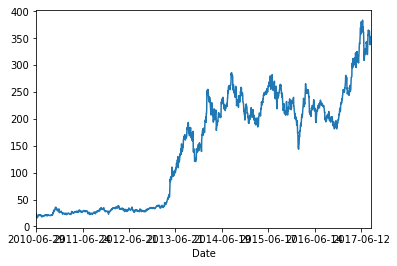

In [4]:
df['tsla_close'].plot()

In [5]:
def gm_returns(col):
    gm_returns = np.log(df[col]).diff()
    #gm_returns.plot()
    return gm_returns

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')

    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
#ACF and PCF plot
import statsmodels.api
def acf_pacf(series):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = statsmodels.graphics.tsaplots.plot_acf(series, lags=60, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = statsmodels.graphics.tsaplots.plot_pacf(series, lags=60, ax=ax2)


In [10]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import math
 
def arima(series, p, d, q):
    X = series
    size = int(len(X) * 0.85)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(p, d, q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = math.sqrt(mean_squared_error(test, predictions))
    print('Test MSE: %.3f' % error)
    # plot
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

In [11]:
def testing_all(col, shift):
    stat_ts = pd.Series()
    gm = gm_returns(col).iloc[1:]
    stat_ts = df[col] - df[col].shift(shift)
    acf_pacf(stat_ts[shift:].values)
    test_stationarity(stat_ts[shift:].values)
    return stat_ts.iloc[shift:]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  import sys


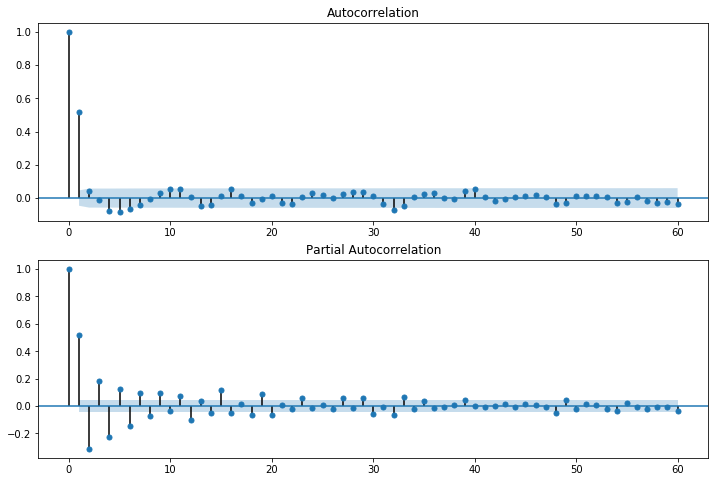

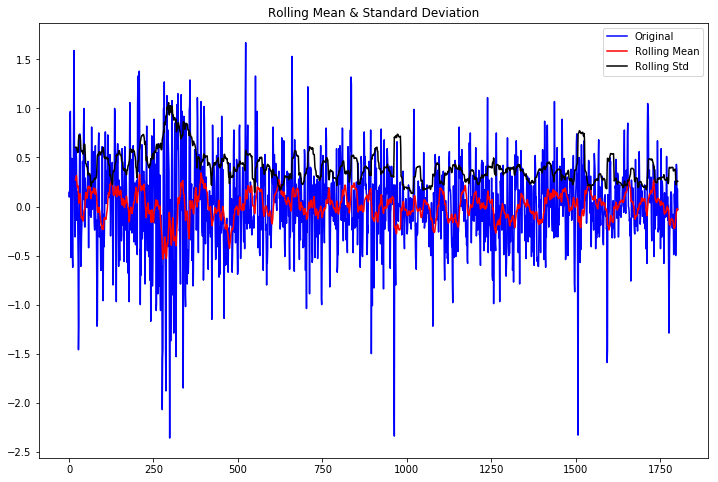

Results of Dickey-Fuller Test:
Test Statistic                -8.660356e+00
p-value                        4.841254e-14
#Lags Used                     2.200000e+01
Number of Observations Used    1.780000e+03
Critical Value (5%)           -2.863165e+00
Critical Value (1%)           -3.434029e+00
Critical Value (10%)          -2.567635e+00
dtype: float64


In [12]:
col = 'abb_close'
res = testing_all(col,2)

predicted=21.064901, expected=21.080000
predicted=21.074830, expected=21.000000
predicted=20.994677, expected=21.230000
predicted=21.225089, expected=21.299999
predicted=21.295380, expected=21.389999
predicted=21.385598, expected=21.559999
predicted=21.556001, expected=21.860001
predicted=21.856705, expected=22.020000
predicted=22.017205, expected=22.070000
predicted=22.067371, expected=22.129999
predicted=22.127540, expected=22.049999
predicted=22.047424, expected=22.059999
predicted=22.057404, expected=22.360001
predicted=22.357954, expected=22.059999
predicted=22.057591, expected=21.950001
predicted=21.947190, expected=22.070000
predicted=22.067355, expected=21.990000
predicted=21.987249, expected=21.940001
predicted=21.937113, expected=21.840000
predicted=21.836893, expected=21.910000
predicted=21.906968, expected=21.760000
predicted=21.756720, expected=21.670000
predicted=21.666452, expected=22.070000
predicted=22.067156, expected=22.209999
predicted=22.207701, expected=22.540001


predicted=24.973840, expected=25.070000
predicted=25.074063, expected=25.000000
predicted=25.004003, expected=24.980000
predicted=24.983912, expected=25.129999
predicted=25.134153, expected=25.230000
predicted=25.234416, expected=25.799999
predicted=25.805448, expected=25.530001
predicted=25.535283, expected=25.540001
predicted=25.545133, expected=25.299999
predicted=25.304705, expected=25.340000
predicted=25.344635, expected=25.350000
predicted=25.354658, expected=25.110001
predicted=25.114242, expected=25.340000
predicted=25.344500, expected=25.180000
predicted=25.184335, expected=24.910000
predicted=24.913764, expected=25.360001
predicted=25.364409, expected=25.500000
predicted=25.504870, expected=25.049999
predicted=25.054137, expected=25.190001
predicted=25.194145, expected=25.309999
predicted=25.314426, expected=25.400000
predicted=25.404619, expected=25.360001
predicted=25.364602, expected=25.320000
predicted=25.324497, expected=25.180000
predicted=25.184229, expected=24.740000


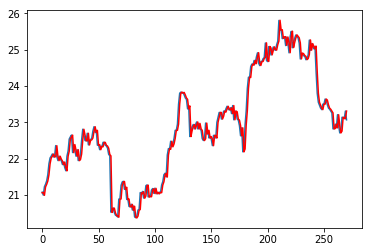

In [13]:
arima(df[col].values, 0, 2, 1)

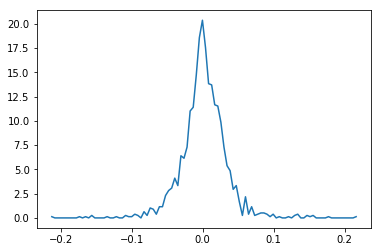

In [14]:
hist, bins = np.histogram(gm_returns('tsla_close').values[1:], bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)

In [15]:
import seaborn as sns
sns.set(color_codes=True)

def pdf(col):
    sns.distplot(gm_returns(col).values[1:])

abb_close
asys_close
ccgi_close
cenx_close
cmi_close
fslr_close
ge_close
pcrfy_close
tsla_close


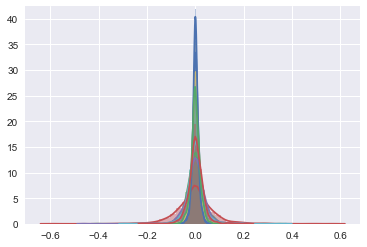

In [16]:
for col in df.columns:
    print(col)
    pdf(col)

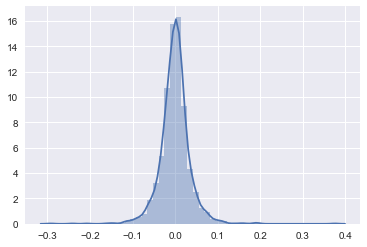

In [20]:
pdf('fslr_close')